In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
### set file path
fdiry = file.path(FD_RES, "track_compare")
fname = "dat_peak_inp_coverage.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_track = dat
print(dim(dat))
head(dat)

[1] 394   7


Peak,Source,Input,Output,pLog2FC_Z,FC,Log2FC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,ASTARR,2.505205e-04,4.209979e-04,0.67905530,1.6804931,0.7488846
chrX_47796208_47796828,TMPRA,3.921516e+02,2.570960e+03,1.07468709,6.5560349,2.7128235
chrX_47806139_47808167,ASTARR,1.999403e-04,2.545971e-04,0.25270920,1.2733653,0.3486464
chrX_47806139_47808167,TMPRA,3.998284e+02,1.343544e+03,0.52885285,3.3603025,1.7485911
chrX_47809119_47809445,ASTARR,1.498082e-04,1.412415e-04,0.01083213,0.9428154,-0.0849528
chrX_47809119_47809445,TMPRA,3.392270e+02,3.935902e+03,2.56027497,11.6025609,3.5363714


In [3]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "annotation")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.union_narrowPeak.ccre_all.bed.gz"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_CCRE", "Start_CCRE", "End_CCRE", "Name", "Score", "Strand", 
           "Value1", "Value2", "Value3", "Label1", "Label2",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))

### assign
dat_ccre = dat
print(dim(dat))
head(dat)

[1] 165907     16


Chrom,Start,End,Chrom_CCRE,Start_CCRE,End_CCRE,Name,Score,Strand,Value1,Value2,Value3,Label1,Label2,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,180982,182087,chr1,181251,181601,EH38E1310153,0,.,181251,181601,"6,218,147",DNase-only,All-data/Full-classification,350,chr1_180982_182087
chr1,777949,779437,chr1,778562,778912,EH38E1310158,0,.,778562,778912,"255,0,0","PLS,CTCF-bound",All-data/Full-classification,350,chr1_777949_779437
chr1,777949,779437,chr1,779086,779355,EH38E1310159,0,.,779086,779355,"255,0,0",PLS,All-data/Full-classification,269,chr1_777949_779437
chr1,816774,817547,chr1,817080,817403,EH38E1310166,0,.,817080,817403,"225,225,225",Low-DNase,All-data/Full-classification,323,chr1_816774_817547
chr1,818602,819380,chr1,818718,818872,EH38E1310168,0,.,818718,818872,"225,225,225",Low-DNase,All-data/Full-classification,154,chr1_818602_819380
chr1,819732,820291,chr1,819893,820227,EH38E1310170,0,.,819893,820227,"225,225,225",Low-DNase,All-data/Full-classification,334,chr1_819732_820291


In [4]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "annotation")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.union_narrowPeak.remap2022_nr.bed.gz"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_ReMap", "Start_ReMap", "End_ReMap", "Name", "Score", "Strand", 
           "Value1", "Value2", "Value3",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Peak=paste(Chrom, Start, End, sep="_"))

### assign
dat_remap = dat
print(dim(dat))
head(dat)

[1] 5520842      14


Chrom,Start,End,Chrom_ReMap,Start_ReMap,End_ReMap,Name,Score,Strand,Value1,Value2,Value3,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,10015,10442,chr1,10016,10229,ZBTB5:K-562,1,.,10108,10109,215958,213,chr1_10015_10442
chr1,136071,137429,chr1,136239,136897,ZBTB33:K-562,1,.,136734,136735,252224252,658,chr1_136071_137429
chr1,136071,137429,chr1,136277,137062,EGR1:K-562,2,.,136757,136758,56224140,785,chr1_136071_137429
chr1,136071,137429,chr1,136281,137167,ZNF639:K-562,1,.,136754,136755,224112112,886,chr1_136071_137429
chr1,136071,137429,chr1,136332,136968,TRIM24:K-562,2,.,136803,136804,25256252,636,chr1_136071_137429
chr1,136071,137429,chr1,136340,137098,NR2C1:K-562,2,.,136788,136789,4125089,758,chr1_136071_137429


## Summarize

In [23]:
head(dat_track)

Peak,Source,Input,Output,pLog2FC_Z,FC,Log2FC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,ASTARR,2.505205e-04,4.209979e-04,0.67905530,1.6804931,0.7488846
chrX_47796208_47796828,TMPRA,3.921516e+02,2.570960e+03,1.07468709,6.5560349,2.7128235
chrX_47806139_47808167,ASTARR,1.999403e-04,2.545971e-04,0.25270920,1.2733653,0.3486464
chrX_47806139_47808167,TMPRA,3.998284e+02,1.343544e+03,0.52885285,3.3603025,1.7485911
chrX_47809119_47809445,ASTARR,1.498082e-04,1.412415e-04,0.01083213,0.9428154,-0.0849528
chrX_47809119_47809445,TMPRA,3.392270e+02,3.935902e+03,2.56027497,11.6025609,3.5363714


In [32]:
peaks = dat_track$Peak
peaks = intersect(peaks, dat_ccre$Peak)
peaks = intersect(peaks, dat_remap$Peak)
length(peaks)

[1] 96

In [38]:
###
dat = dat_ccre  
dat = dat %>% 
    dplyr::filter(Peak %in% peaks) %>% 
    dplyr::rename(Label = Label1) 

###
dat = dat %>% 
    group_by(Peak, Label) %>% 
    summarize(Count = n(), .groups="drop")

dat_sub_ccre = dat
print(dim(dat))
head(dat)

[1] 137   3


Peak,Label,Count
<chr>,<chr>,<int>
chrX_47806139_47808167,Low-DNase,3
chrX_47814810_47815443,"CTCF-only,CTCF-bound",1
chrX_47836113_47837157,pELS,1
chrX_47836113_47837157,PLS,1
chrX_47936250_47937308,DNase-only,2
chrX_47936250_47937308,Low-DNase,1


In [39]:
###
dat = dat_remap
dat = dat %>% dplyr::filter(Peak %in% peaks)

###
tmp = dat$Name
tmp = str_split(tmp, ":")
tmp = lapply(tmp, function(x){x[1]})
tmp = unlist(tmp)
dat$Label = tmp

###
dat = dat %>% 
    group_by(Peak, Label) %>% 
    summarize(Count = n(), .groups = "drop")

###
dat_sub_remap = dat
print(dim(dat))
head(dat)

[1] 7477    3


Peak,Label,Count
<chr>,<chr>,<int>
chrX_47806139_47808167,CTCF,1
chrX_47806139_47808167,RAD21,1
chrX_47806139_47808167,YY1,1
chrX_47814810_47815443,ARID1B,1
chrX_47814810_47815443,BRD2,1
chrX_47814810_47815443,BRD4,1


In [42]:
dat = dat_track
dat = dat %>% 
    dplyr::filter(Source == "ASTARR") %>% 
    dplyr::filter(Peak %in% peaks) %>%
    dplyr::select(Peak, Input) %>% 
    distinct

dat_sub_track = dat
print(dim(dat))
head(dat)

[1] 96  2


Peak,Input
<chr>,<dbl>
chrX_47806139_47808167,0.0001999403
chrX_47814810_47815443,0.0002484208
chrX_47836113_47837157,0.0014720662
chrX_47936250_47937308,0.0006439217
chrX_47958646_47959379,0.0002347711
chrX_48003426_48004417,0.0005912724


In [43]:
print(length(unique(dat_sub_track$Peak)))
print(length(unique(dat_sub_ccre$Peak)))
print(length(unique(dat_sub_remap$Peak)))

[1] 96
[1] 96
[1] 96


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


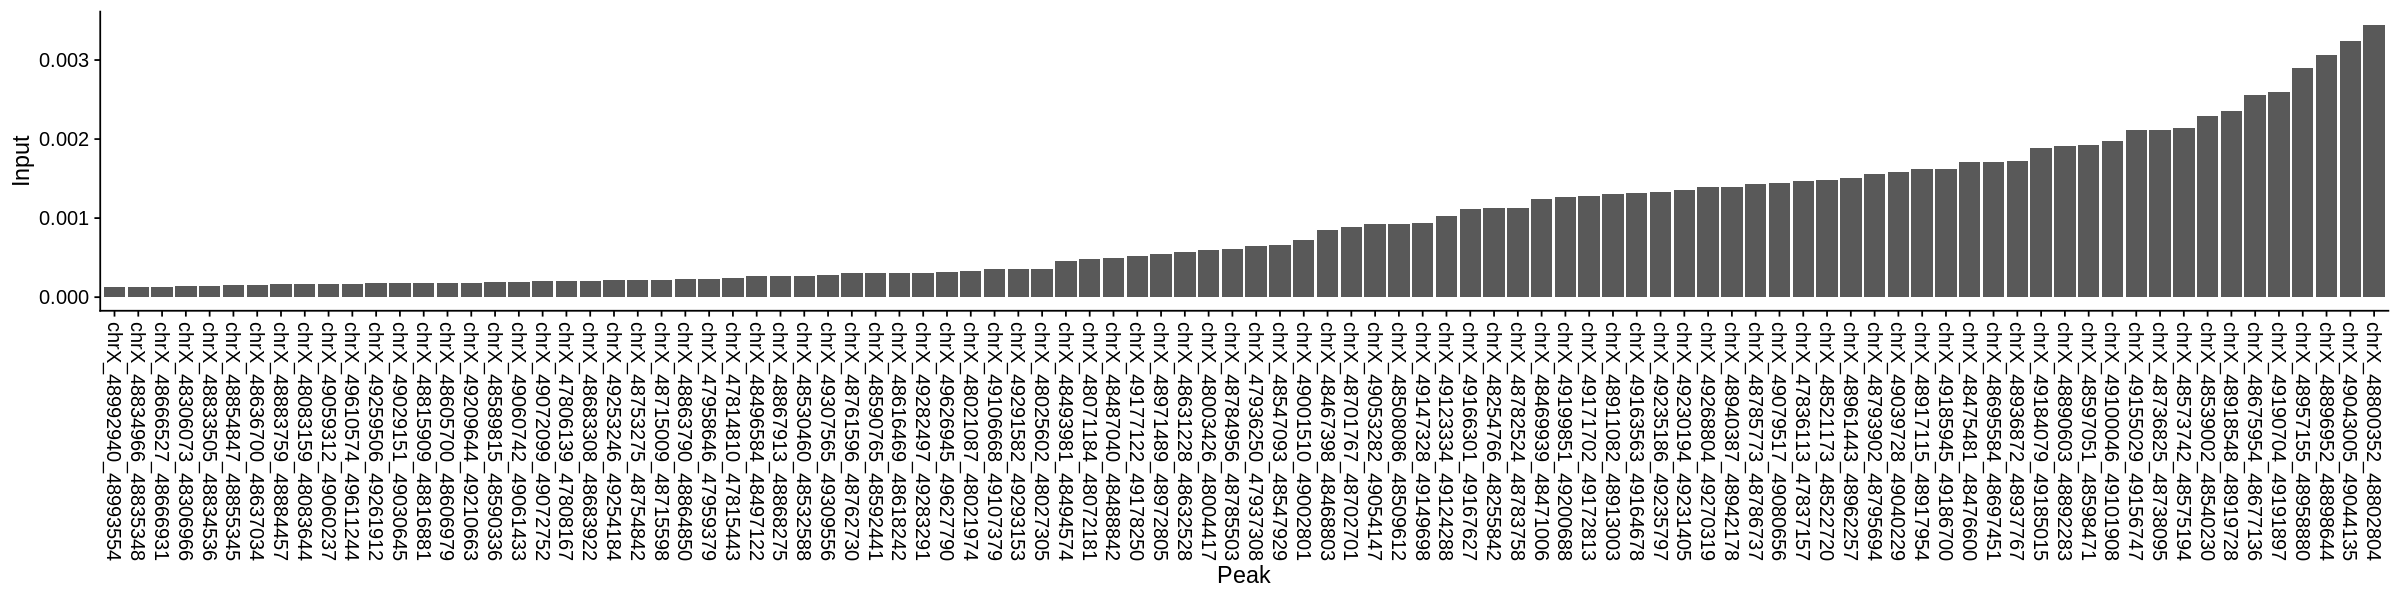

In [55]:
dat = dat_sub_track %>% arrange(-Input)
peaks = dat$Peak

dat$Peak = factor(dat$Peak, levels=rev(peaks))
gpt = ggplot(dat, aes(x=Peak, y=Input)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, angle=270))

options(repr.plot.height=5, repr.plot.width=20) 
print(gpt)

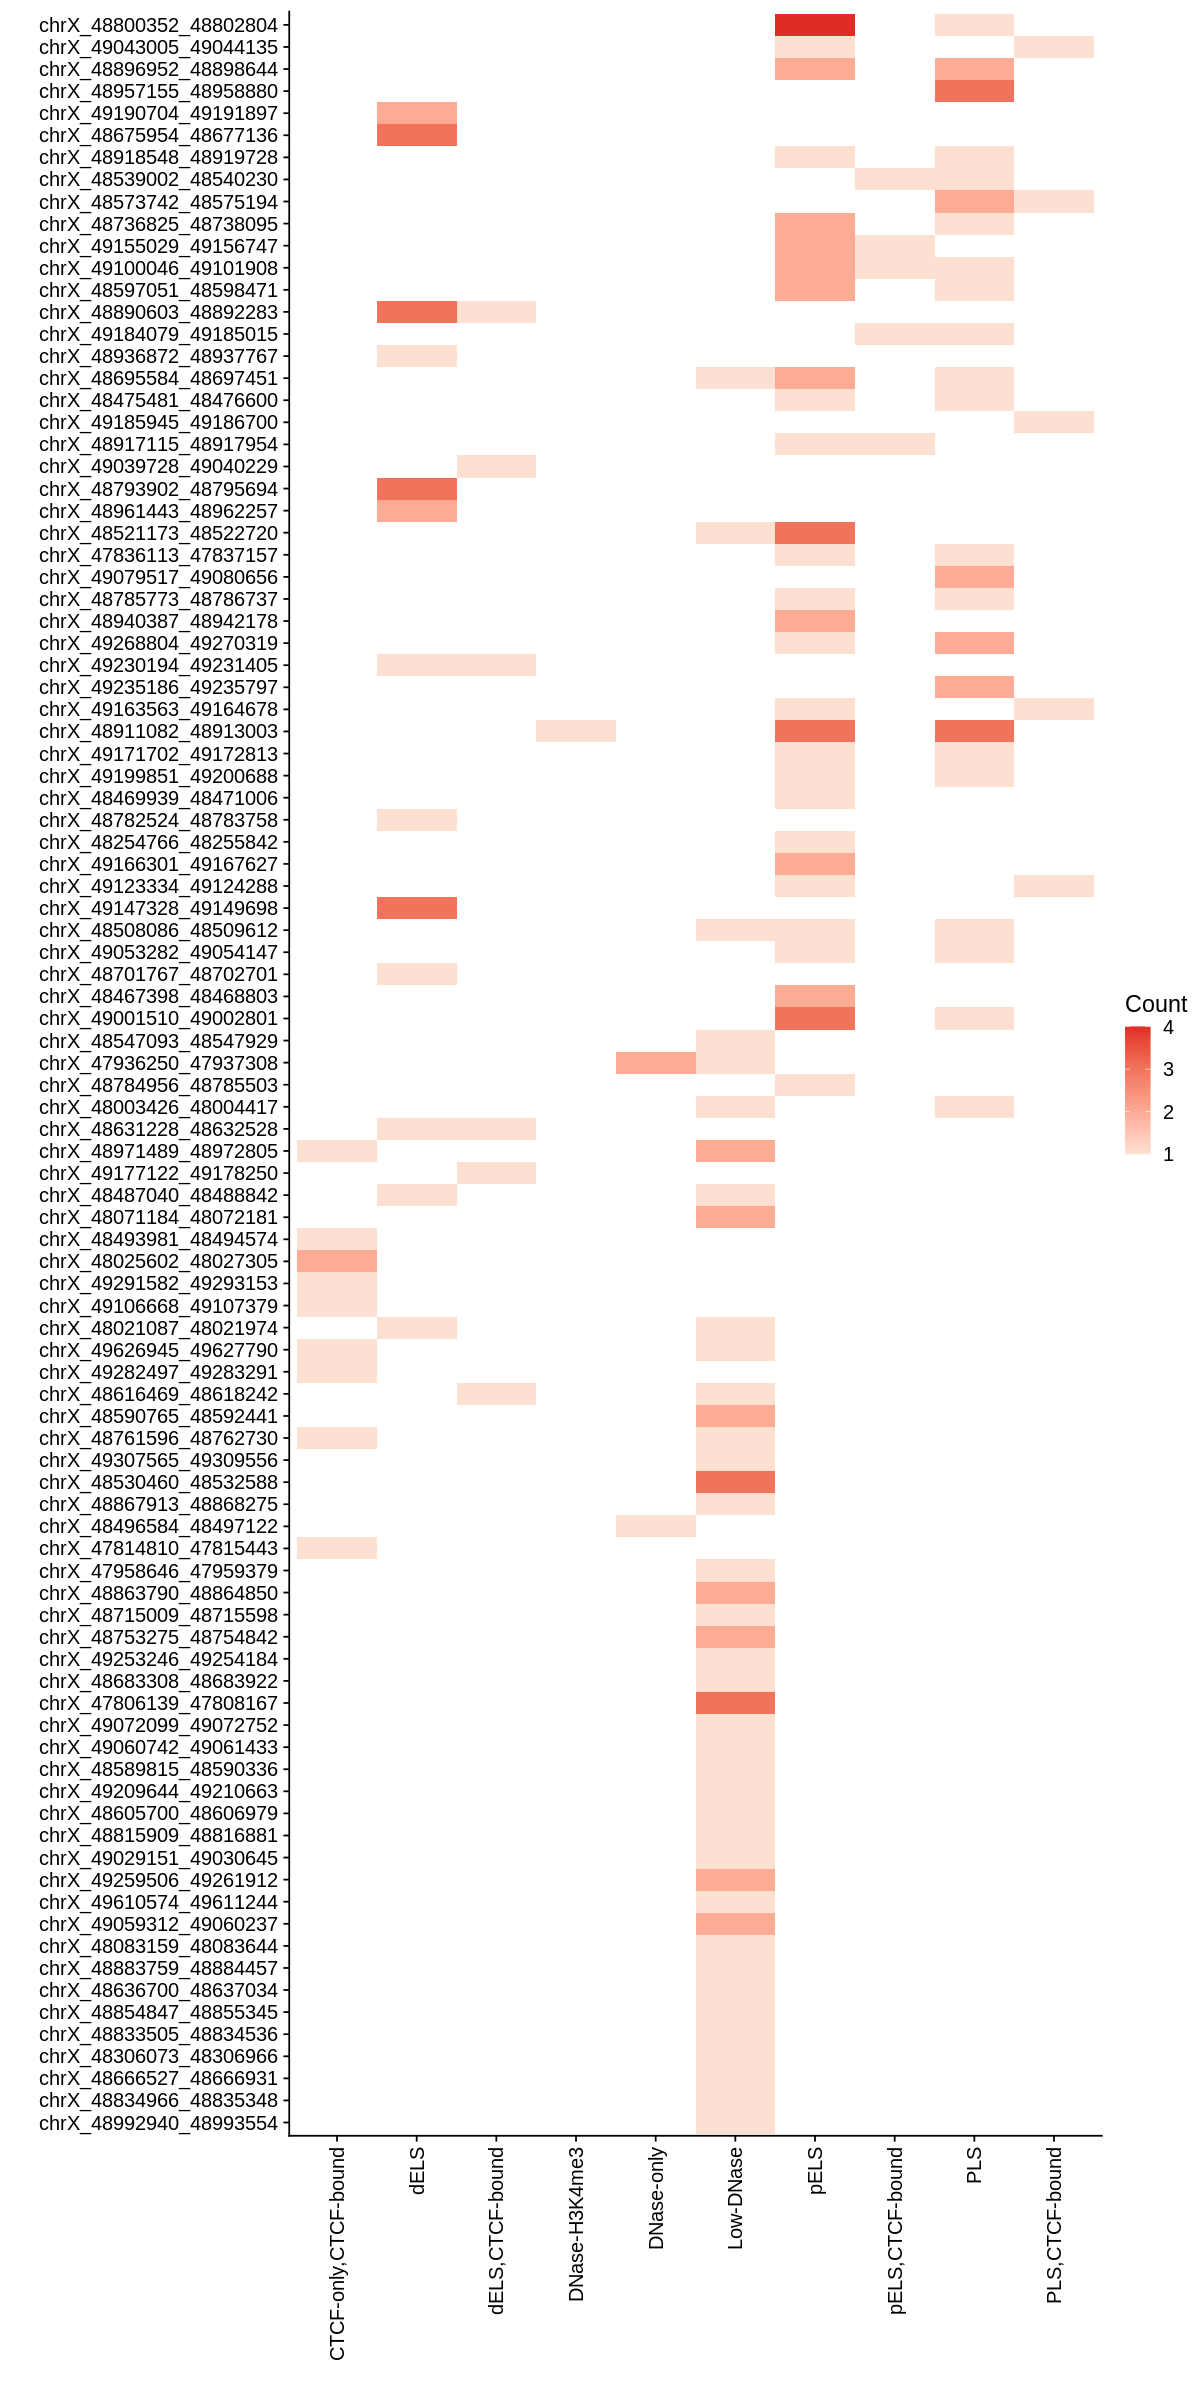

In [63]:
dat = dat_sub_ccre
dat$Peak = factor(dat$Peak, levels=rev(peaks))

gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Count)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    scale_fill_gradient(low = "#fee0d2", high = "#de2d26") +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=10)
print(gpt)

In [59]:
head(dat_sub_remap)

Peak,Label,Count
<chr>,<chr>,<int>
chrX_47806139_47808167,CTCF,1
chrX_47806139_47808167,RAD21,1
chrX_47806139_47808167,YY1,1
chrX_47814810_47815443,ARID1B,1
chrX_47814810_47815443,BRD2,1
chrX_47814810_47815443,BRD4,1


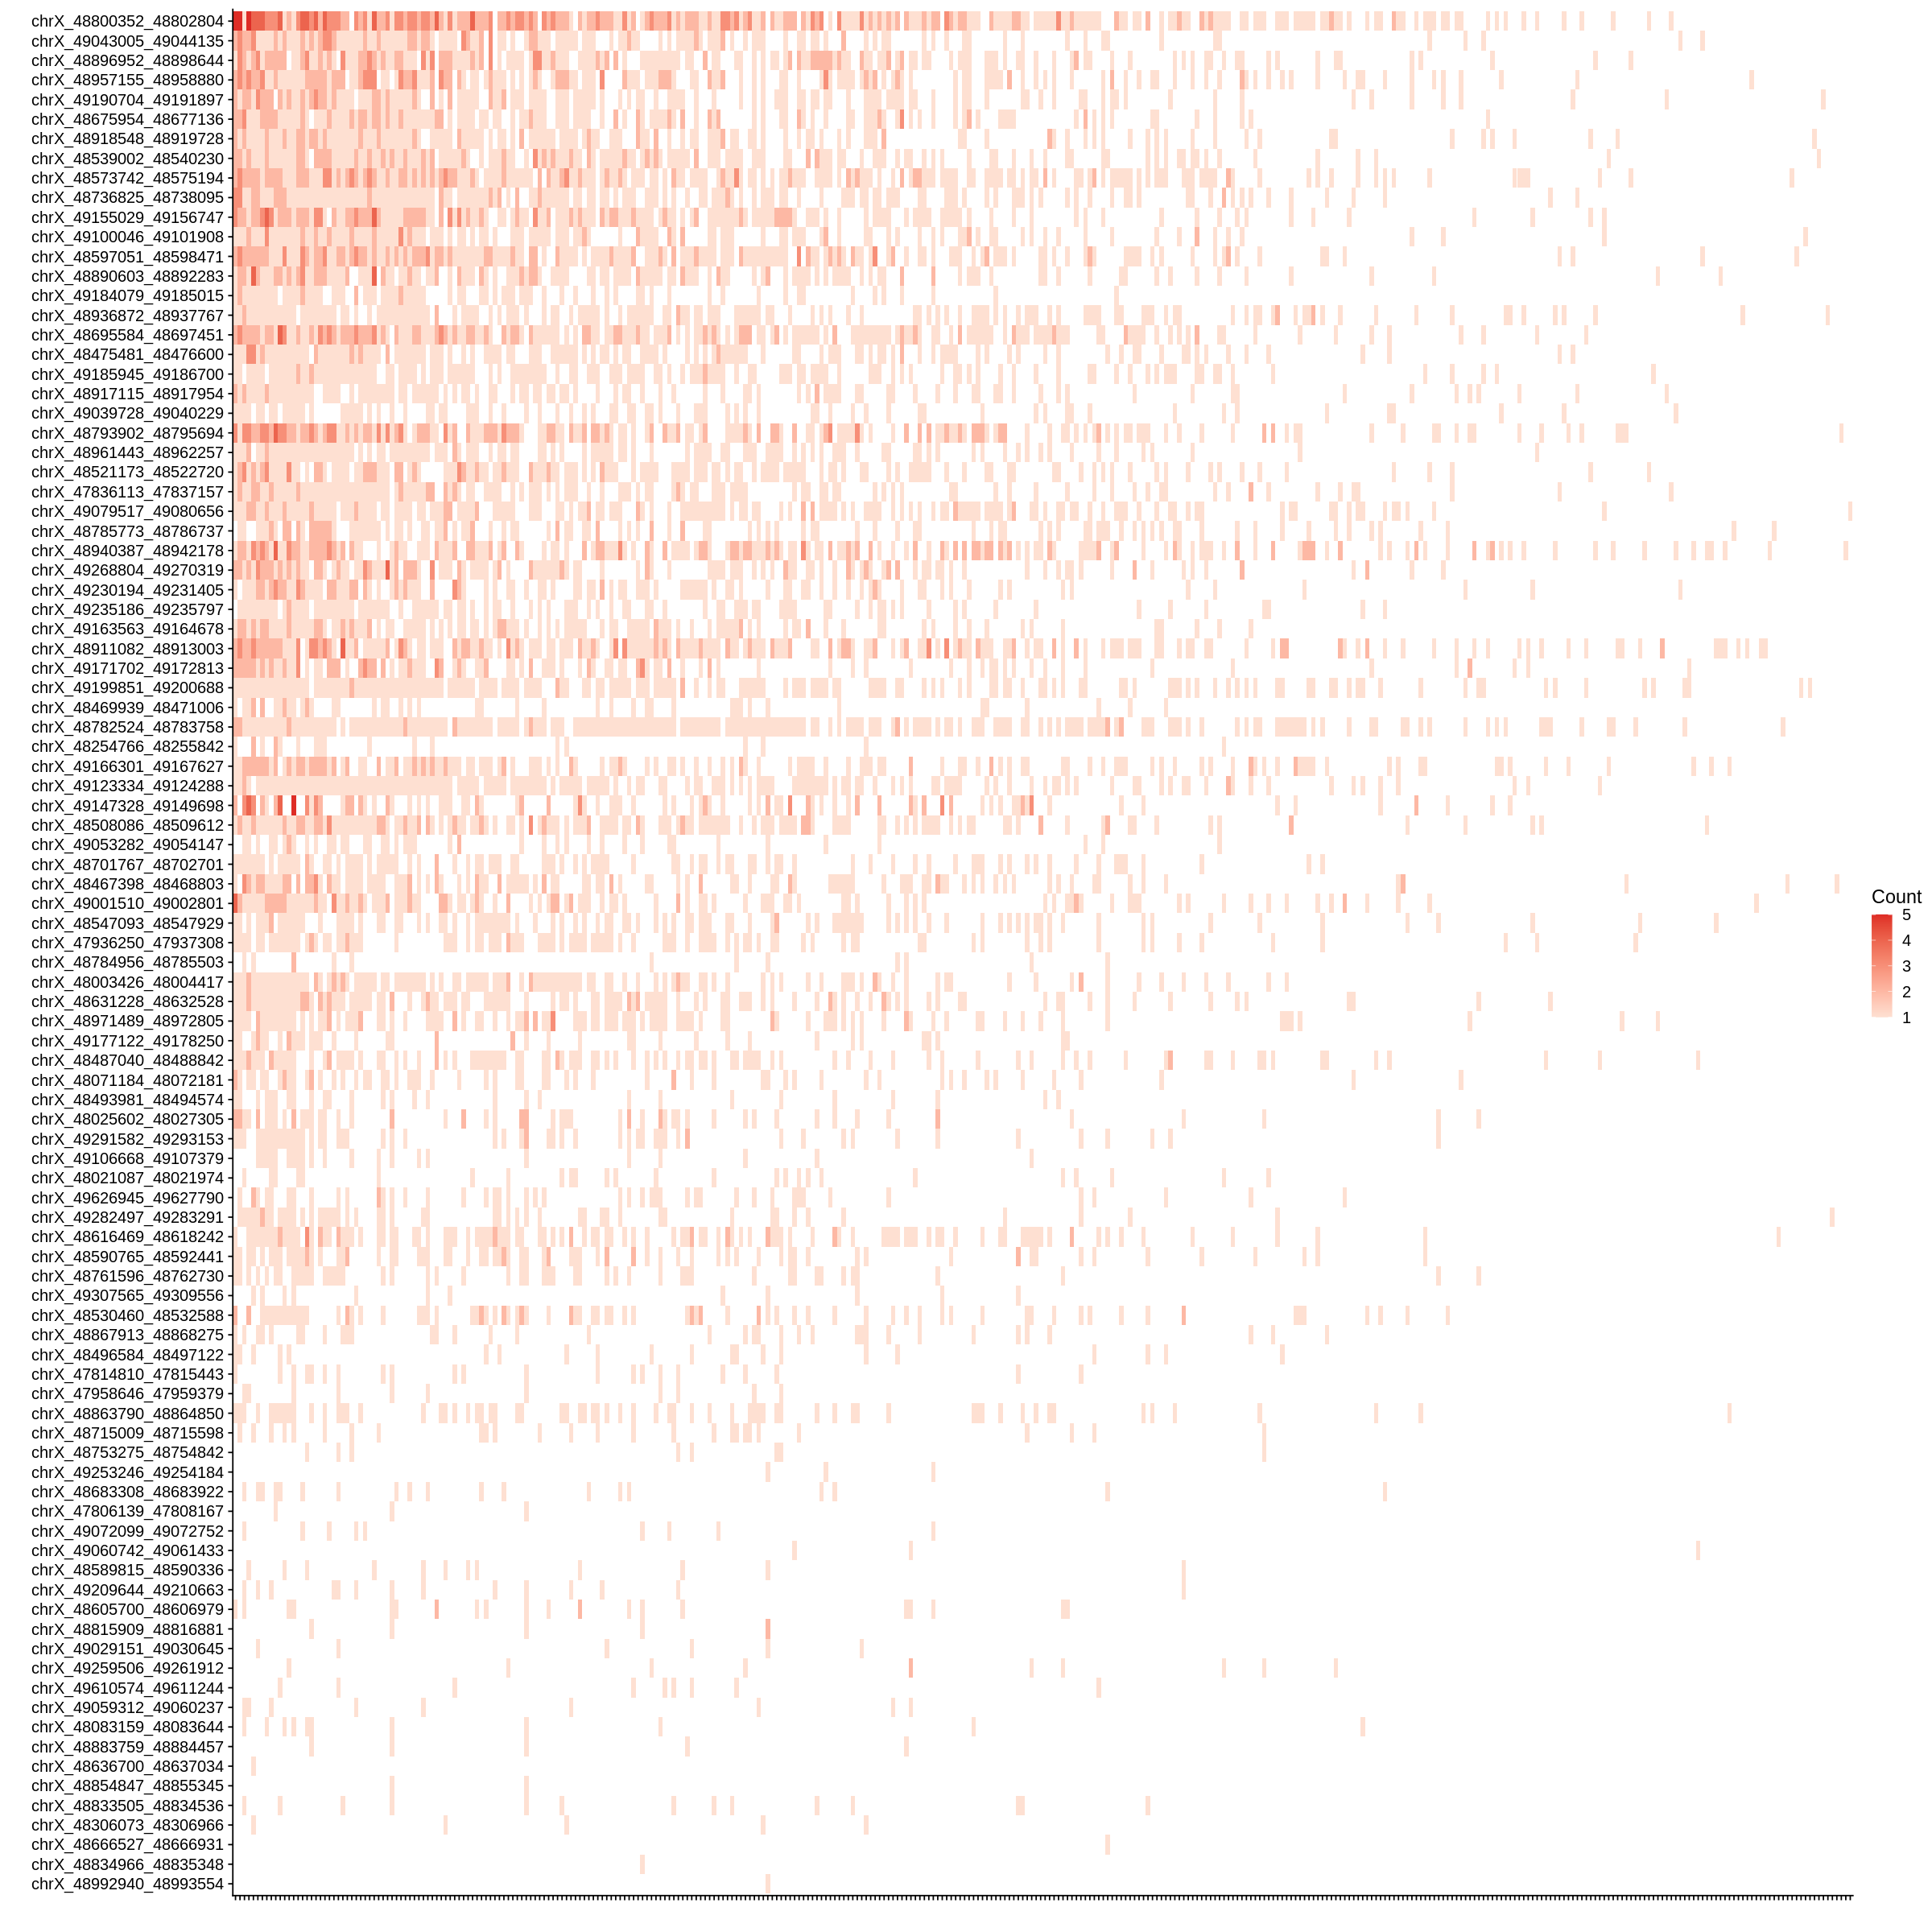

In [62]:
dat = dat_sub_remap

tmp = dat %>% group_by(Label) %>% summarise(Total = sum(Count), .groups = "drop")
tmp = tmp %>% arrange(-Total)

dat$Peak  = factor(dat$Peak,  levels=rev(peaks))
dat$Label = factor(dat$Label, levels=tmp$Label)

gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Count)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_blank()) +
    scale_fill_gradient(low = "#fee0d2", high = "#de2d26") +
    labs(x="", y="")

options(repr.plot.height=20, repr.plot.width=20)
print(gpt)

In [19]:
dat = dat_ccre 

dat = dat %>% dplyr::rename(Label = Label1) %>% dplyr::filter(Chrom == "chrX")
dat = dat %>% group_by(Chrom, Start, End, Label) %>% summarize(Count = n(), .groups="drop")
dat = dat %>% dplyr::mutate(Peak = paste(Chrom, Start, End, sep="_"))
head(dat)

Chrom,Start,End,Label,Count,Peak
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
chrX,19079,20855,"DNase-H3K4me3,CTCF-bound",1,chrX_19079_20855
chrX,259811,260484,Low-DNase,1,chrX_259811_260484
chrX,261053,262755,Low-DNase,4,chrX_261053_262755
chrX,275662,277148,Low-DNase,2,chrX_275662_277148
chrX,275662,277148,PLS,1,chrX_275662_277148
chrX,278898,279360,dELS,1,chrX_278898_279360


In [21]:
dat %>% spread(Label, Count) %>% head(10)

Chrom,Start,End,Peak,"CTCF-only,CTCF-bound",dELS,"dELS,CTCF-bound",DNase-H3K4me3,"DNase-H3K4me3,CTCF-bound",DNase-only,Low-DNase,pELS,"pELS,CTCF-bound",PLS,"PLS,CTCF-bound"
<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chrX,19079,20855,chrX_19079_20855,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA
chrX,259811,260484,chrX_259811_260484,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
chrX,261053,262755,chrX_261053_262755,NA,NA,NA,NA,NA,NA,4,NA,NA,NA,NA
chrX,275662,277148,chrX_275662_277148,NA,NA,NA,NA,NA,NA,2,NA,NA,1,NA
chrX,278898,279360,chrX_278898_279360,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,281105,282011,chrX_281105_282011,NA,NA,NA,NA,NA,NA,NA,NA,NA,2,NA
chrX,283115,283693,chrX_283115_283693,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA
chrX,317748,319418,chrX_317748_319418,NA,NA,NA,NA,NA,NA,NA,2,NA,NA,1
chrX,330741,331616,chrX_330741_331616,NA,NA,NA,NA,NA,NA,2,NA,NA,NA,NA


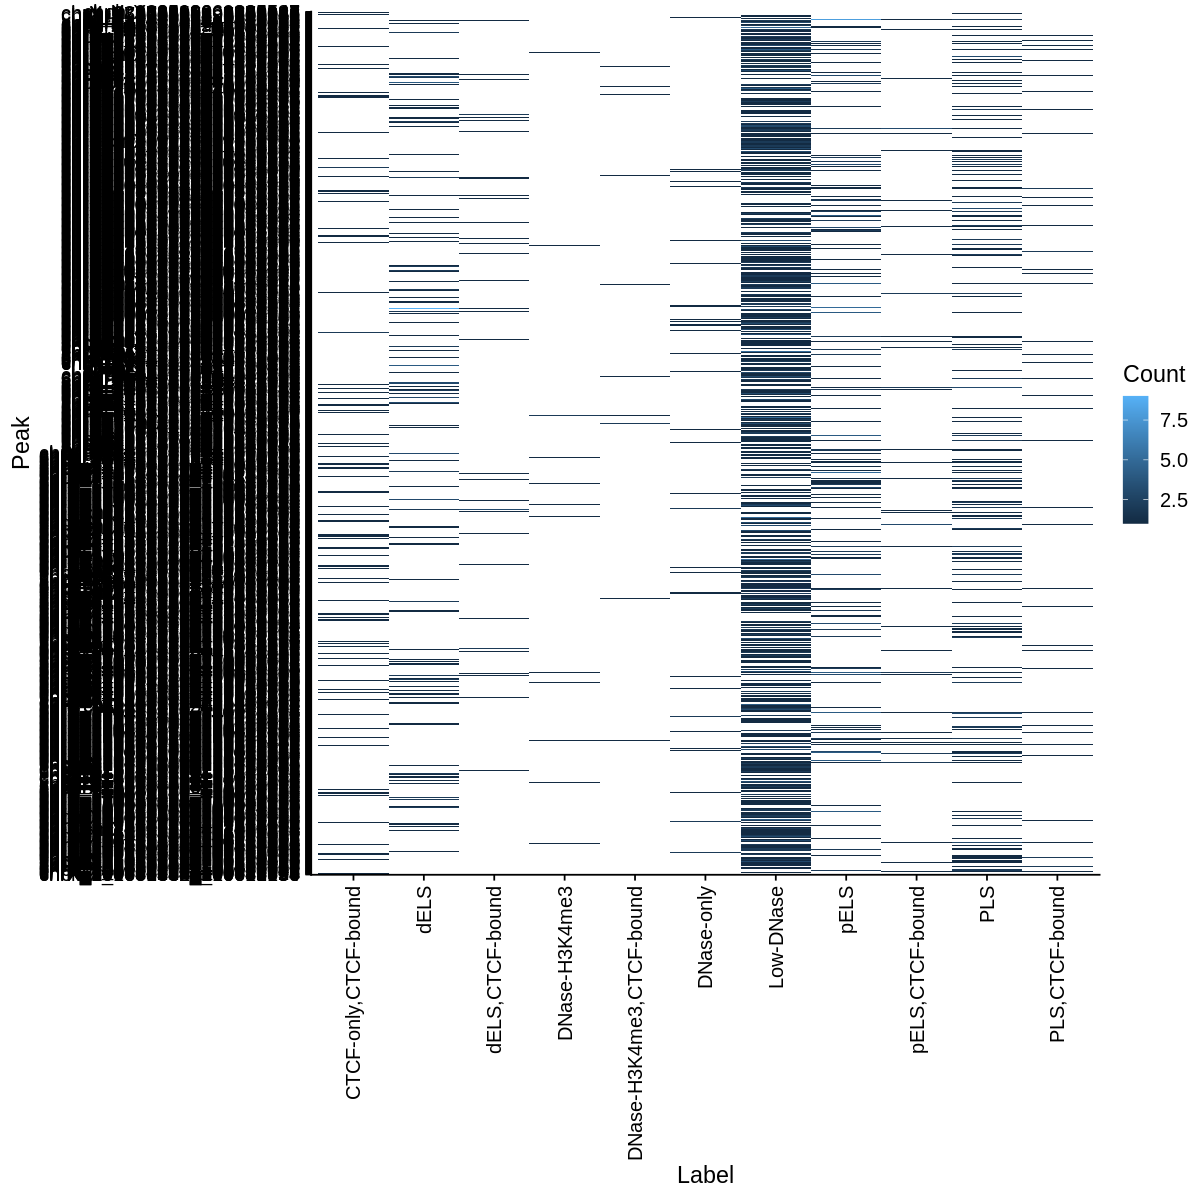

In [29]:
gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Count)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)

In [32]:
dat = dat_remap 
print(dim(dat))

dat = dat %>% dplyr::filter(Chrom == "chrX")
print(dim(dat))

dat = dat %>% group_by(Chrom, Start, End, Label) %>% summarize(Count = n(), .groups = "drop")
dat = dat %>% dplyr::mutate(Peak = paste(Chrom, Start, End, sep="_"))
print(dim(dat))

head(dat)

[1] 5520842      14
[1] 130867     14
[1] 112410      6


Chrom,Start,End,Label,Count,Peak
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
chrX,19079,20855,BRD3,1,chrX_19079_20855
chrX,19079,20855,BRD4,1,chrX_19079_20855
chrX,19079,20855,CTBP1,1,chrX_19079_20855
chrX,19079,20855,CTCF,1,chrX_19079_20855
chrX,19079,20855,CTCFL,2,chrX_19079_20855
chrX,19079,20855,DEAF1,1,chrX_19079_20855


In [31]:
dat %>% spread(Label, Count) %>% head(10)

Chrom,Start,End,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,⋯,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF79,ZNF83,ZNF830,ZSCAN29,ZZZ3
<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chrX,19079,20855,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,227324,227659,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,251299,252336,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
chrX,253536,254166,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,259811,260484,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,261053,262755,NA,NA,NA,NA,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,275662,277148,NA,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,278898,279360,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chrX,280134,280880,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


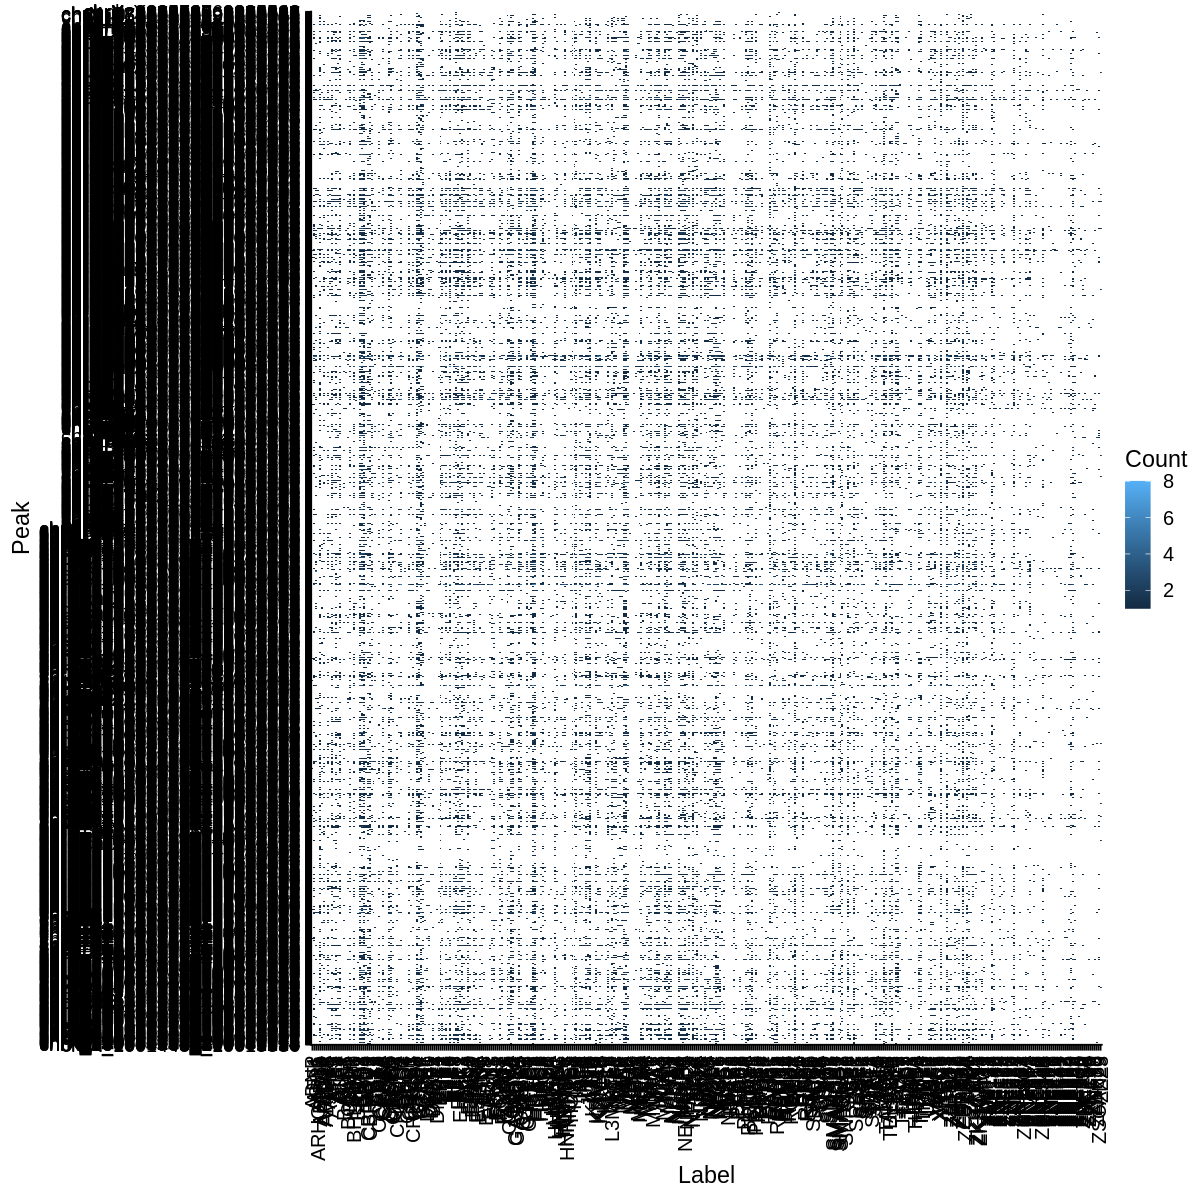

In [33]:
gpt = ggplot(dat, aes(x=Label, y=Peak, fill=Count)) + 
    geom_tile() + 
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90))

options(repr.plot.height=10, repr.plot.width=10)
print(gpt)